In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [2]:
data= pd.read_csv(r'C:\Users\HP\Downloads\Bank_data.csv')
data

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,no
514,514,0.861,0.0,0.0,2.0,1.0,806.0,yes
515,515,0.879,0.0,0.0,0.0,0.0,290.0,no
516,516,0.877,0.0,0.0,5.0,1.0,473.0,yes


In [3]:
raw= data.copy()
raw['y']=raw['y'].map({'yes':1,'no':0})
raw

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4,4.856,0.0,1.0,0.0,0.0,157.0,0
...,...,...,...,...,...,...,...,...
513,513,1.334,0.0,1.0,0.0,0.0,204.0,0
514,514,0.861,0.0,0.0,2.0,1.0,806.0,1
515,515,0.879,0.0,0.0,0.0,0.0,290.0,0
516,516,0.877,0.0,0.0,5.0,1.0,473.0,1


In [4]:
y=raw['y']
x1=raw['duration']

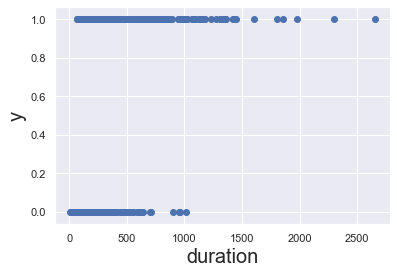

In [5]:
plt.scatter(x1,y)
plt.xlabel('duration',fontsize=20)
plt.ylabel('y',fontsize=20)
plt.show()


In [6]:
x= sm.add_constant(x1)
reg_log= sm.Logit(y,x)
results_log= reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


In [7]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  518
Model:                          Logit   Df Residuals:                      516
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Jun 2020   Pseudo R-squ.:                  0.2121
Time:                        00:57:27   Log-Likelihood:                -282.89
converged:                       True   LL-Null:                       -359.05
Covariance Type:            nonrobust   LLR p-value:                 5.387e-35
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.7001      0.192     -8.863      0.000      -2.076      -1.324
duration       0.0051      0.001      9.159      0.000       0.004       0.006
==============================================================================
"""

In [8]:
# odd2=1.005odd1(1)

In [9]:
# accuracy

In [10]:
results_log.pred_table()

array([[204.,  55.],
       [104., 155.]])

In [11]:
# 69% accuracy

In [12]:
cm_df= pd.DataFrame(results_log.pred_table())
cm_df.columns=['predicted 0','predicted 1']
cm_df= cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,predicted 0,predicted 1
Actual 0,204.0,55.0
Actual 1,104.0,155.0


In [13]:
cm = np.array(cm_df)
accuracy_train = (cm[0,0]+cm[1,1]/cm.sum())
accuracy_train

204.2992277992278

In [14]:
print('missclassification rate:'+str((1+1)/19))

missclassification rate:0.10526315789473684
